# Machine Learning Project: Wine Quality Classification

This project involves a machine learning task where participants will choose between two main paths: classification or regression. In this example, we will focus on a classification task using the Red Wine Quality dataset from Kaggle.

## Step 1: Data Download


In [7]:
import pandas as pd

# Load the Red Wine Quality dataset
data_url = "winequality-red.csv"
wine_data = pd.read_csv(data_url)


## Step 2: Exploratory Data Analysis (EDA)

We will start by exploring the dataset to understand its structure and content.


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

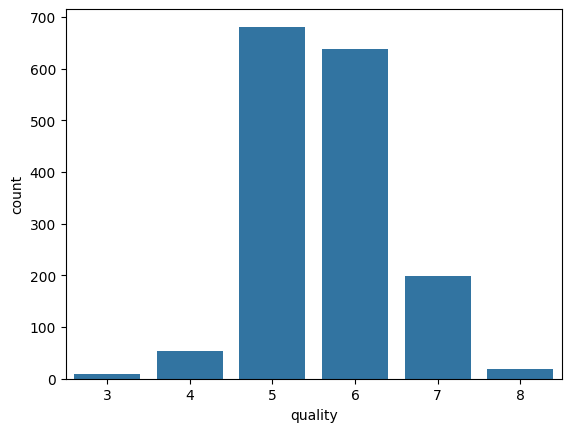

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first five rows of the dataset
print(wine_data.head())

# Display the statistical summary of the dataset
print(wine_data.describe())

# Visualize the distribution of the 'quality' ratings
sns.countplot(x='quality', data=wine_data)
plt.show()


## Step 3: Data Preprocessing

Before training our model, we need to preprocess the data by handling missing values, encoding categorical variables, and splitting the dataset into training and testing sets.


In [9]:
# Check for missing values
print(wine_data.isnull().sum())

# Convert categorical variables to numerical
wine_data['quality'] = wine_data['quality'].astype('category').cat.codes

# Separate features and target variable
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## Step 4: Model Selection and Training

We will use the RandomForestClassifier as our model and train it on the preprocessed data.


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train the Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model's performance on the test dataset
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        10
           2       0.72      0.75      0.73       130
           3       0.63      0.69      0.66       132
           4       0.63      0.52      0.57        42
           5       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.66      0.64       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Step 5: Model Evaluation

After training the model, we will evaluate its performance using the confusion matrix and other metrics.


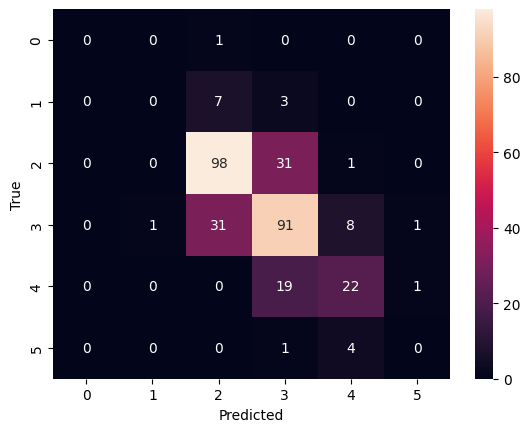

In [11]:
from sklearn.metrics import confusion_matrix

# Visualize the model's performance with a confusion matrix
conf_mat = confusion_matrix(y_test, predictions)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
